
# Import Python libraries.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Datasets

In [6]:
train_data = pd.read_csv("Training Data.csv")
test_data = pd.read_csv("Test Data.csv")

# Check how train dataset looks like.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [34]:
test_data

,id,income,experience,married,Age,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,19,0,0,0,0,0,0,0,4,13
1,2,1215004,5,0,1,0,0,1,1,1,5,10
2,3,8901342,12,0,0,0,0,2,2,1,9,14
3,4,1944421,9,1,0,0,1,3,3,1,3,12
4,5,13429,18,0,1,0,1,4,4,0,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,13,0,0,0,0,21,78,6,5,10
27996,27997,2917765,9,0,0,0,0,40,149,8,9,14
27997,27998,8082415,5,0,1,0,0,2,179,1,4,13
27998,27999,9474180,13,0,0,0,1,16,12,9,13,14


In [8]:
category = pd.cut(train_data.age,bins=[18, 25, 35, 60, 120],labels=['Student', 'Young', 'Adult', 'Senior'])
train_data.insert(5,'Age',category)

In [9]:
category = pd.cut(test_data.age,bins=[18, 25, 35, 60, 120],labels=['Student', 'Young', 'Adult', 'Senior'])
test_data.insert(5,'Age',category)

In [10]:
del train_data['age']
del test_data['age']

In [11]:
print(train_data.nunique())

Id                     252000
income                  41917
experience                 21
married                     2
Age                         4
house_ownership             3
car_ownership               2
profession                 51
city                      317
state                      29
current_job_years          15
current_house_years         5
risk_flag                   2
dtype: int64


# Convert datatype of selected fields.

In [12]:
train_data["profession"]=pd.factorize(train_data.profession)[0]
train_data["Age"]=pd.factorize(train_data.Age)[0]
train_data["city"]=pd.factorize(train_data.city)[0]
train_data["state"]=pd.factorize(train_data.state)[0]
train_data["married"]=pd.factorize(train_data.married)[0]
train_data["house_ownership"]=pd.factorize(train_data.house_ownership)[0]
train_data["car_ownership"]=pd.factorize(train_data.car_ownership)[0]

In [13]:
test_data["profession"]=pd.factorize(test_data.profession)[0]
test_data["Age"]=pd.factorize(test_data.Age)[0]
test_data["city"]=pd.factorize(test_data.city)[0]
test_data["state"]=pd.factorize(test_data.state)[0]
test_data["married"]=pd.factorize(test_data.married)[0]
test_data["house_ownership"]=pd.factorize(test_data.house_ownership)[0]
test_data["car_ownership"]=pd.factorize(test_data.car_ownership)[0]


# Drop the dependent variable from the train dataset. 

In [14]:
x=train_data.drop("risk_flag",axis=1)
y=train_data["risk_flag"]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y
                                                 ,test_size=0.2,random_state=42)

# training data

In [15]:
from sklearn.ensemble import RandomForestClassifier 

In [16]:
R_model=RandomForestClassifier(n_jobs=-1,
                              n_estimators=200,
                               max_depth=40,
                              random_state=42,
                              min_samples_leaf=1)
R_model.fit(X_train,y_train)
R_model.score(X_test,y_test)

0.9091666666666667

In [20]:
y_preds=R_model.predict(X_test)

# Model Evaluation 

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve


In [21]:
print(confusion_matrix(y_test,y_preds))

[[43043  1104]
 [ 3474  2779]]


In [23]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     44147
           1       0.72      0.44      0.55      6253

    accuracy                           0.91     50400
   macro avg       0.82      0.71      0.75     50400
weighted avg       0.90      0.91      0.90     50400



In [24]:
r_probs = [0 for _ in range(len(y_test))]

In [25]:
model1_probs=R_model.predict_proba(X_test)


In [26]:
model1_probs=model1_probs[:,1]

In [28]:
r_auc=roc_auc_score(y_test,r_probs)
model1_auc=roc_auc_score(y_test,model1_probs)
print('model1: AUROC = %.3f' % (model1_auc))

model1: AUROC = 0.925


In [29]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, model1_probs)

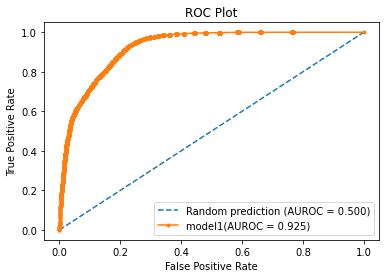

In [31]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='model1(AUROC = %0.3f)' % model1_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# building model on full data set

In [32]:
R_final=RandomForestClassifier(n_jobs=-1,
                              n_estimators=200,
                               max_depth=40,
                              random_state=42,
                              min_samples_leaf=1)
R_final.fit(x,y)

RandomForestClassifier(max_depth=40, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [36]:
final_predict=R_final.predict(test_data)

In [37]:
final_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
final_predict=pd.DataFrame(final_predict)

In [40]:
final_predict.to_csv("final.csv")